In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

- Ensembles are methods that combine multiple machine learning models to create powerful models.
    - Random Forest
    - Gradient Boosted Decision Trees
    
# 1. Random Forests

- Build many trees and averaging their result to reduct overfitting.(Mathematically Prove)
- To implement this strategy, we need to build many decision trees.
- Two ways to make tree randomized.
    - Randomized by selecting the dat points used to build a tree.
    - Randomized by selecting the features in each split test.
    
## Building Random Forests

- Decide the number of trees to build (n_estimators parameter).
- First take bootstrap sample of our data.
    - If we have n_samples data, draw an example randomly with replacement, n_samples times.
    - Some data will be missing and some will be repeated.
- A decision tree is build based on this newly created dataset.
    - Each tree operates on a different subset of features.
    - If we set max_features to n_features, each split look at all features in the dataset, and no randomnes will be injected in the feature selection. (only randomnes from bootstrap sampling)

- Final prediction:
    - Classification: soft voting
    - Regression : average the result
    
## Analyzing Random Forests
**Example 1**
- Apply random forest consisting of five trees  to the two_moons dataset

In [4]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3) 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42) 
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

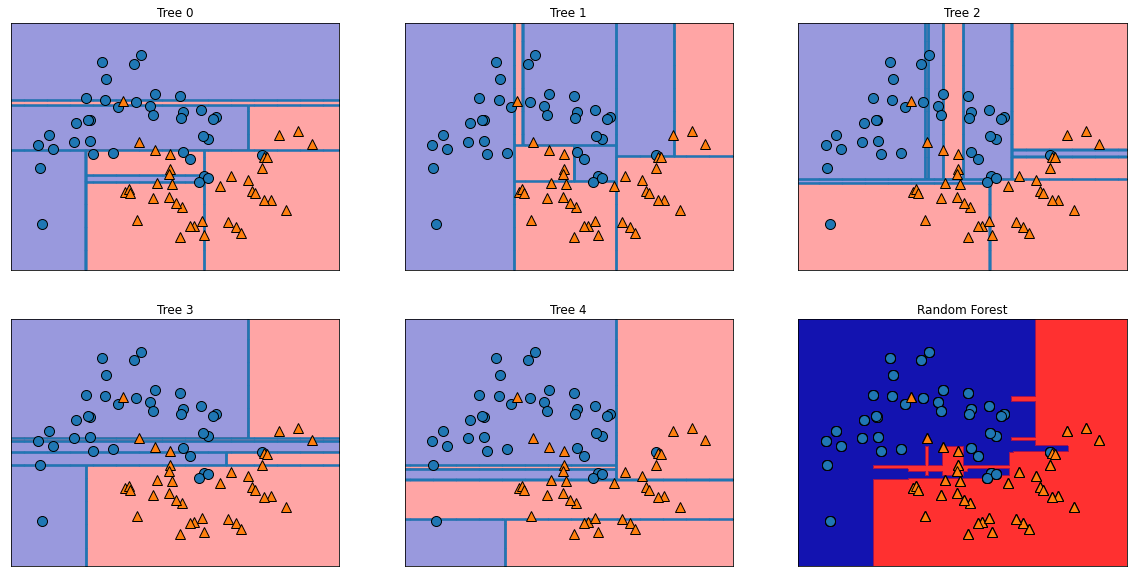

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i)) 
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
    axes[-1, -1].set_title("Random Forest") 
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

- Overfits less than any of the trees individually, and provides much more intuitive decision boundary.
- In real world, we use more trees, leading to even smoother boundaries.

**Example 2**

- Apply random forest consisting of 100 trees  on the Breast cancer dataset.

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


- Better than the linear models or a single decisio tree, without turning any parameters.

**Feature Importances**

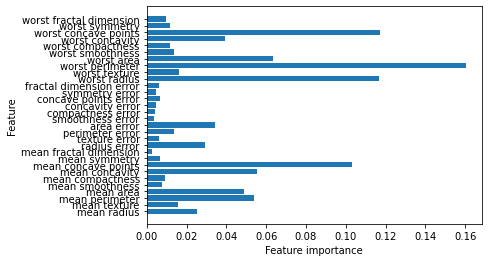

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(forest)

- Captures a much broader picture of the data than a single data.

## Parameters
- random_state: want to have reproducible results, set random_state.
- n_estimators: number of trees to use.
- max_features: maximum number of features that can use.(followings are default)
    - Classification: max_features=sqrt(n_features)
    - Regression: max_features=n_features
- max_depth: depth of each tree.

## Strengths, Weaknesses
- Don't tend to perform well on very high dimensional, sparse data, such as text data. (linear model is better)
- More memory and are slower to train and to predict than linear models.

# 2. Gradient Boosted Regression Trees
- Works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.
- Use very shallow trees, of depth one to five.
- Combine many simple models like shallow trees.
- learning_rate is important parameter, which controls how strongly each tree tries to correct the mistakes of the previous trees.
    - higher learning_rate: each tree can make stronger corrections.
    
**Example 1**
- 100 trees of maximum depth 3 and a learning rate of 0.1

In [16]:
from sklearn.ensemble import GradientBoostingClassifier 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


- Overfitting since training set accuracy is 1.000.
- Apply stronger pre-prunning by limiting the maximum depth or lower the learning rate.

In [17]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [20]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate =0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


- lowering the maximum provided a significant improvement of the model.

**Feature Importances**

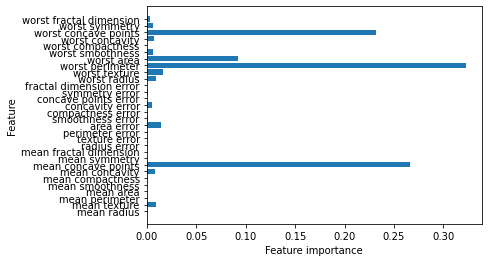

In [21]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

- Gradient Boosting completely ignored some of the features.

## Parameters
- n_estimators: number of trees to use.
- max_features: maximum number of features that can use.(followings are default)
- n_iter_no_change: validation score is not proving iteration done earlier
- max_depth: depth of each tree.(set very low for gradient boosted, not deeper than five)

## Strengths, Weakness
- Most powerful and widely used models for supervised learning.
- Works well on a mixture of binary and continuous features.
- Careful tuning the parameters.
- Take a long time to train.
- Does not work well on high-dimensional sparse data.